In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
rawData = pd.read_csv("Kepler_Data.csv")
rawData = rawData.drop("koi_disposition", axis = 1)
rawData
le = LabelEncoder()
y = le.fit_transform(rawData['koi_pdisposition'])
X = rawData.drop("koi_pdisposition", axis = 1)
dropCols = X.filter(regex="err\d$").columns
X = X.drop(dropCols,axis = 1)

In [ ]:
numericCols = X.select_dtypes(np.number).columns.to_list()
X = X[numericCols]
ss = StandardScaler()

# find numeric columns
X = X.fillna(0)
X[numericCols] = ss.fit_transform(X)
X = X.drop(["rowid", "kepid"], axis = 1)

In [ ]:
X = X.drop("koi_score", axis = 1)

In [ ]:
fpflag = X.filter(regex="fpflag").columns
X = X.drop(fpflag, axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
XGB = xgb.XGBClassifier(objective = "binary:logistic",)

In [ ]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGB.score(X_test,y_test)

0.8452961672473868

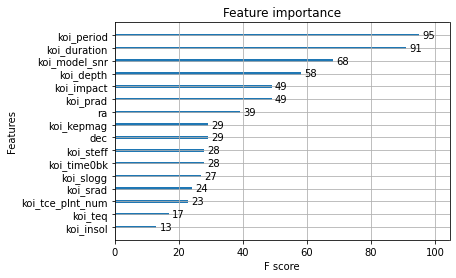

In [ ]:
xgb.plot_importance(XGB)

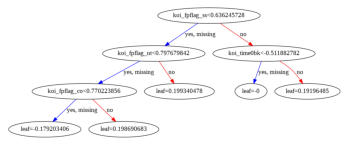

In [ ]:
xgb.plotting.plot_tree(XGB)

In [ ]:
rawData.filter(regex="fpflag")

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
9559,0,0,0,1
9560,0,1,1,0
9561,0,0,0,0
9562,0,0,1,0
